# Problem Set 4: Fixed Income

## Task 2: Bond price, yield-to-maturity and duration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

### d)

### e)

### f)

## Task 3: Yield curve, etc.

### a)

In [2]:
data_3 = pd.read_csv(r'Data/PS4 - Data 3.csv', delimiter = ';', index_col = 'date')

In [3]:
data_3_latest = data_3.iloc[-1, 2:]
print(data_3_latest)

GVT_1M    -0.800
GVT_2M    -0.800
GVT_3M    -0.800
GVT_1Y    -0.750
GVT_2Y    -0.761
GVT_5Y    -0.637
GVT_10Y   -0.304
GVT_15Y   -0.124
GVT_20Y   -0.041
Name: 15.07.2021, dtype: float64


In [4]:
df_IR = pd.DataFrame(index = [1/12, 1/6, 1/4, 1, 2, 5, 10, 15, 20], columns = ['IR'], data = data_3_latest.to_numpy())

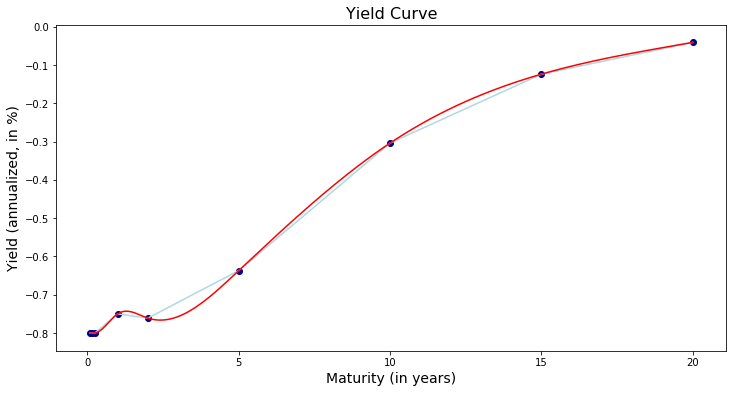

In [13]:
x = df_IR.index
x_new = np.linspace(x.min(), x.max(), 200) 
y = df_IR['IR']

spl = make_interp_spline(x, y, k = 3)
power_smooth = spl(x_new)

plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'lightblue', label = 'Yield Curve (static)')
plt.scatter(x, y, marker = 'o', color = 'darkblue', label = 'Yields (annualized)')
plt.plot(x_new, power_smooth, color = 'red', label = 'Yield Curve (smoothed)')
plt.title("Yield Curve", size = 16)
plt.xlabel("Maturity (in years)", size = 14)
plt.ylabel("Yield (annualized, in %)", size = 14)
plt.xticks([0,5,10,15,20])
plt.show()

### b)

In [9]:
zero_coupon_prices = []
interest_rates = df_IR['IR'].to_numpy()
for i, j in zip(df_IR.index, range(0, len(df_IR.index))):
    zero_coupon_price = (1 + interest_rates[j]/100/i)**(-i)
    zero_coupon_prices.append(zero_coupon_price)
print(zero_coupon_prices)

[1.0084459607773961, 1.0082320727287342, 1.0081639426339235, 1.0075566750629723, 1.0076536554834132, 1.006394418697789, 1.0030450890668936, 1.0012408204376257, 1.0004100882657685]


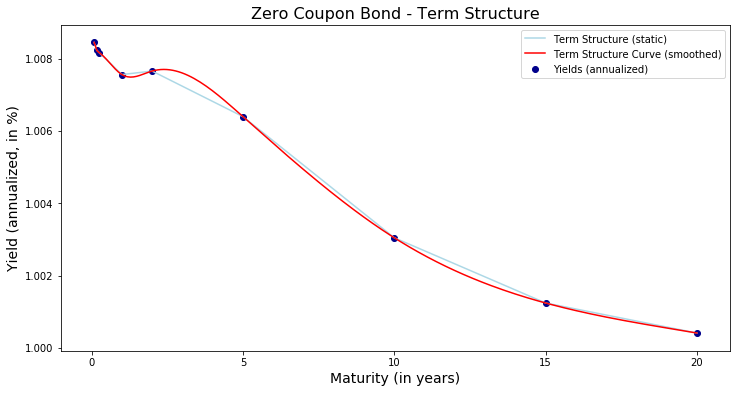

In [18]:
x = df_IR.index
x_new = np.linspace(x.min(), x.max(), 200)
y = zero_coupon_prices

spl = make_interp_spline(x, y, k = 3)
power_smooth = spl(x_new)

plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'lightblue', label = 'Term Structure (static)')
plt.scatter(x, y, marker = 'o', color = 'darkblue', label = 'Yields (annualized)')
plt.plot(x_new, power_smooth, color = 'red', label = 'Term Structure Curve (smoothed)')
plt.title("Zero Coupon Bond - Term Structure", size = 16)
plt.xlabel("Maturity (in years)", size = 14)
plt.ylabel("Yield (annualized, in %)", size = 14)
plt.xticks([0,5,10,15,20])
plt.legend()
plt.show()